In [8]:
import tensorflow as tf

In [32]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [12]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
#normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
#reshaping
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [16]:
model = tf.keras.Sequential()

In [18]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, batch_size=64, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.8038 - accuracy: 0.6923
Epoch 2/2
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.5351 - accuracy: 0.7969


In [23]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4160695694446564, 0.8425]

In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([3.3417871e-06, 9.1882498e-07, 7.1675021e-07, 1.7001587e-06,
       3.7517205e-07, 2.2123896e-02, 2.0684074e-06, 4.6400201e-01,
       3.5986854e-05, 5.1382899e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
class_names[9]

'Ankle boot'

In [29]:
(train_images, train_labels),(orig_test_images, test_labels) = fashion_mnist.load_data()

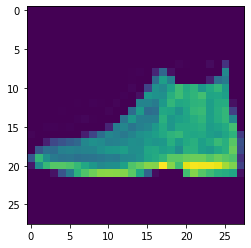

In [33]:
plt.imshow(orig_test_images[0])

In [37]:
def what_is_this_image(test_image):
    test_image = test_image / 255.0
    prediction = model.predict(test_image.reshape(-1,28,28,1))
    index = np.argmax(prediction)
    print("ok we think the following picture is a "+ class_names[index])
    plt.imshow(test_image)

ok we think the following picture is a Dress


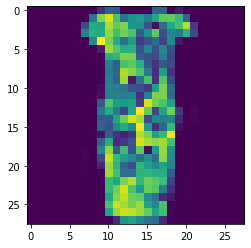

In [40]:
what_is_this_image(orig_test_images[100])